In [1]:
#import urllib
#import pymongo
import time
import re
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from tqdm import tqdm


In [6]:
db = pymongo.MongoClient()
stream = db.twitter.steam_collection

In [8]:
count = 0
value = []
start = time.time()
for i in stream.find({"_id":{"$exists":"true"}}):
    try:
        value.append(i)
        #value.append(i["place"]['country_code'])
    except:
        pass
    break
    
print(time.time()-start)

0.00897526741027832


In [ ]:
image_url = 
response = urllib.request.urlopen(image_url)

In [9]:
re.sub('_normal','',value[0]['user']['profile_image_url_https'])

'https://pbs.twimg.com/profile_images/1308453461755924487/AW49jb95.jpg'

In [ ]:
United States     156271
Brazil             76454
United Kingdom     23311
Japan              22862
Argentina          15868
Turkey             14534
Mexico             14330
Saudi Arabia       13261
Indonesia          12967
India              10892
not found              1
Name: country_name, dtype: int64

In [2]:
data = pd.read_csv('C:\\Users\\KC\\Downloads\\final.csv')

In [9]:
data.head()

,tweet,country_code,bounding_box,screen_name,favourites_count,followers_count,statuses_count,friends_count,listed_count,image_url,banner_url,centroid
0,"Skin trial doang belagu sia,\nDah ah cape mo s...",ID,"[[[107.666224, -6.938641], [107.666224, -6.904...",bangsadpeople,3202.0,636.0,4754.0,442.0,1.0,https://pbs.twimg.com/profile_images/130582291...,https://pbs.twimg.com/profile_banners/10518289...,"(-6.921403, 107.67888099999999)"
1,@Pitty É como você já dizia na letra genial de...,BR,"[[[-48.285982, -16.052405], [-48.285982, -15.5...",HugsOfPoetry,9110.0,171.0,5648.0,597.0,0.0,https://pbs.twimg.com/profile_images/128967808...,https://pbs.twimg.com/profile_banners/10595783...,"(-15.776254, -47.796623000000004)"
2,@ruhsuzkarbonat Yapacak bişi yok...daha iyilerine,TR,"[[[28.632104, 40.802734], [28.632104, 41.23990...",papillonhero,1937.0,236.0,2555.0,601.0,0.0,https://pbs.twimg.com/profile_images/127750686...,https://pbs.twimg.com/profile_banners/78716328...,"(41.0213205, 29.005222500000002)"
3,"""Samay"" aur ""shabd"" dono ka upayog laparvahee ...",IN,"[[[86.054331, 19.850414], [86.054331, 19.90745...",abhi_kumar_pth,279.0,7.0,56.0,23.0,0.0,https://pbs.twimg.com/profile_images/125880954...,https://pbs.twimg.com/profile_banners/12575068...,"(19.878935, 86.08442550000001)"
4,ان الله لا يخيب عبدا تفائل به خيرا💙 https://t....,SA,"[[[46.304398, 24.332068], [46.304398, 25.11181...",M30000o,2.0,5337.0,696.0,218.0,3.0,https://pbs.twimg.com/profile_images/119581213...,https://pbs.twimg.com/profile_banners/11958119...,"(24.721943500000002, 46.685077)"


In [3]:
profile = []
banner = []
none = []
count = 0
start = time.time()
for num in tqdm(range(100)):
    image_url = data.iloc[num]["image_url"]
    banner_url = data.iloc[num]["banner_url"]
    try:
        profile.append((Image.open(requests.get(image_url, stream=True).raw)))
        banner.append((Image.open(requests.get(banner_url, stream=True).raw)))
    except:
        none.append(num)
        count += 1
        
print(time.time()-start)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.41it/s]

22.683534383773804


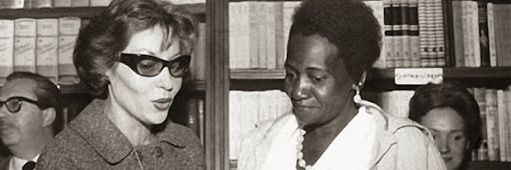

In [4]:
banner[0]

In [6]:
image_size

528

In [9]:
import torch
from torchvision import transforms
from efficientnet_pytorch import EfficientNet

In [28]:
model_name = 'efficientnet-b6'
image_size = EfficientNet.get_image_size(model_name)
img = banner[0]

array(528)

In [29]:
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [30]:
img.shape

torch.Size([1, 3, 528, 528])

In [38]:
model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 56, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(56, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        56, 56, kernel_size=(3, 3), stride=[1, 1], groups=56, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(56, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        56, 14, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        14, 56, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        56, 32, kernel_siz

In [25]:
model = EfficientNet.from_pretrained(model_name)

Loaded pretrained weights for efficientnet-b6


In [32]:
#only extract features
with torch.no_grad():
    features = model.extract_features(img)
print(features.shape) # torch.Size([1, 1280, 7, 7])

torch.Size([1, 2304, 17, 17])


In [40]:
#get 1000 predicted classifications from imagenet
with torch.no_grad():
    output =model(img)
preds = torch.topk(output, k=5).indices.squeeze(0).tolist()

In [39]:
features.shape

torch.Size([1, 2304, 17, 17])

In [41]:
preds

[523, 587, 356, 837, 836]